HW2 - NYC Restaurants

Setup
Import pandas and everything else necessary for the HW
Read in the data set

In [3]:
from pandas import Series, DataFrame
import pandas as pf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pf.read_csv("/Users/matthewstreichler/Desktop/MSBA/Summer Semester/MIS 381N/Homework/HW2/NYC_Restaurants.csv", dtype=str)

Q1 - Create a unique name for each restaurant

Created a new column in the DataFrame by adding together series' from the original DataFrame. I added spaces in between each pre-existing series so that it can be read as a restaurant with an address

In [5]:
df["RESTAURANT"] = df["DBA"] + " " + df["BUILDING"] + " " + df["STREET"] + " " + df["ZIPCODE"] + " " + df["BORO"]
df["RESTAURANT"].iloc[:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

Q2 - How many restaurants are included in the data?

I used unique() and len() to count and find the length of the number of unique addresses

In [6]:
unique_rest = df["RESTAURANT"].unique()
len(unique_rest)

10114

Q3 - How many chains are there?

I paired the DBA series with the RESTAURANT series and dropped duplicates based on the DBA series. I then used value_counts() to find the total amount of chains per DBA. Finally, I found the length of that with the parameter of >1

In [7]:
rest_chains = df[["DBA", "RESTAURANT"]].drop_duplicates()["DBA"].value_counts()
len(rest_chains[rest_chains>1])

368

Q4 - Plot a bar graph of the top 20 most popular chains

I took the restaurant chains from above and used indexing to find the top 20

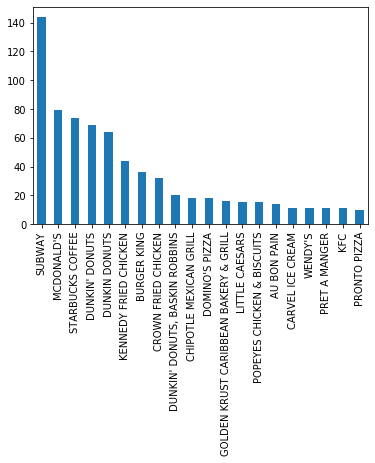

In [8]:
top_20_rest_chains = rest_chains[:20]
top_20_rest_chains.plot(kind="bar")

Q5 - What fraction of all restaurants are chain restaurants?

I used the length of restaurants with more than 1 location and divided that by the length of unique restaurants

In [9]:
rest_chains_frac = len(rest_chains[rest_chains>1]) / len(unique_rest)
rest_chains_frac

0.036385208621712475

Q6 - Plot the number of non-chain restaurants in each boro

I first got a list of all the restaurants in the DataFrame. I made a mask and returned only those restaurants that had a value count of 1 (meaning not a chain) and applied that mask to the DataFrame. I then plotted the counts of boro

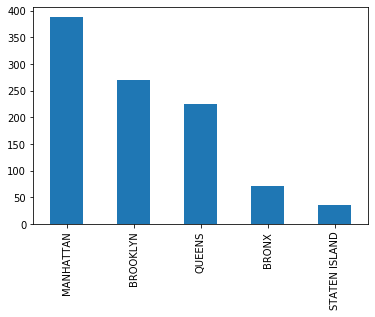

In [10]:
mask = (df['BORO'] == 'Missing')
df.loc[mask, 'BORO'] = np.nan

no_chain = df["DBA"].value_counts()

def not_a_chain(rest):
    return no_chain[rest] == 1

non_chain_mask = df["DBA"].map(not_a_chain)
non_chain = df[non_chain_mask]
non_chain["BORO"].value_counts().plot(kind="bar")

Q7 - Plot the fraction of non-chain restaurants in each boro

I used the last line from Q6 (minus the .plot) and set that equal to a series for amount of non-chain restaurants in each Boro. I then found the amount of unique restaurants per boro and then divided non-chains by total restaurants. No, based on the output, Manhattan has the most amount of independent restaurants totaling 388, but based on the bar graph below, Brooklyn has the highest ratio of independent restaurants to total restaurants

MANHATTAN        388
BROOKLYN         270
QUEENS           224
BRONX             71
STATEN ISLAND     35
Name: BORO, dtype: int64

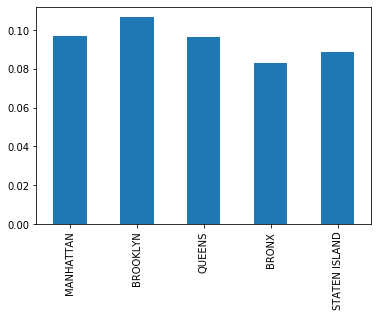

In [11]:
boro_frac = non_chain["BORO"].value_counts()
total_rest = df[["RESTAURANT", "BORO"]].drop_duplicates()["BORO"].value_counts()
non_chain_per_boro = boro_frac / total_rest
non_chain_per_boro.plot(kind="bar")

boro_frac

Q8 - Plot the popularity of cuisines

I paired the RESTAURANT series with the CUISINE DESCRIPTION series and dropped duplicates based on cuisine. Then I applied value_counts() to determine which was the most popular cuisine

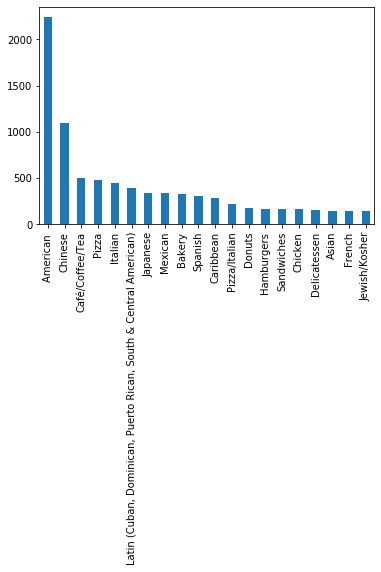

In [12]:
unique_cuis = df[["RESTAURANT", "CUISINE DESCRIPTION"]].drop_duplicates()["CUISINE DESCRIPTION"].value_counts()
unique_cuis[:20].plot(kind="bar")

Q9 - Plot the cuisines among restaurants which never got cited for violations

In [25]:
#cite = df[["RESTAURANT", "CUISINES", "VIOLATION CODE"]].drop_duplicates


#unique_cuis = df[["RESTAURANT", "CUISINE DESCRIPTION"]].drop_duplicates()["CUISINE DESCRIPTION"].value_counts()
#unique_cuis[:20].plot(kind="bar")

df["VIOLATION CODE"]
cite_mask = (df["VIOLATION CODE"] == NaN)
cite_mask
#cite_mask[cite_mask=="TRUE"]
#cite = df[cite_mask]
#cite



#mask = (df['BORO'] == 'Missing')
#df.loc[mask, 'BORO'] = np.nan

#no_chain = df["DBA"].value_counts()

#def not_a_chain(rest):
#    return no_chain[rest] == 1

#non_chain_mask = df["DBA"].map(not_a_chain)
#non_chain = df[non_chain_mask]
#non_chain["BORO"].value_counts().plot(kind="bar")

0        False
1        False
2        False
3        False
4        False
         ...  
44628    False
44629    False
44630    False
44631    False
44632    False
Name: VIOLATION CODE, Length: 44633, dtype: bool